In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

> Query performed by different User
```
Input: It is the list of query performed by different user placed at different sites.

Following terminologies are followed:
c: Create
d: Delete
r: read
n: represents query has not accessed that attribute
```

In [2]:
user_query_list = pd.read_csv('Book1.csv',index_col='sites')
user_query_list=user_query_list.fillna('n')
user_query_list=user_query_list.sort_values(by=['sites'])
print(user_query_list)
data=user_query_list.to_numpy()

        A1 A2 A3   A4 A5 A6 A7 A8   A9 A10
sites                                     
1        c  n  n    n  n  n  n  c    n   n
2        r  n  r    n  n  n  n  n    n   r
3        n  r  n    n  n  r  n  n    n   n
4        c  n  n    n  n  n  c  c    n   n
5        n  n  n  r,r  r  r  r  r    n   n
6        n  n  n    r  r  r  n  n    n   n
7        n  n  r    n  r  r  n  r    n   r
8        d  d  d    d  d  d  d  d  d,r   d
9      d,r  d  d    d  d  d  d  d    d   d
10       c  c  n    n  n  n  n  n    n   n


> Site Attribute Usage Matrix
* SAUM(Si, Aj) = Number of user query performed on site Si to use attribute Aj

In [3]:
num_of_attributes=data[0].shape[0]
num_of_sites = data.shape[0]
for i in range(num_of_sites):
    for j in range(0,num_of_attributes):
        data[i][j] = 0 if data[i][j]=='n' else 1
saum=np.array(data,dtype=np.int32)
saum

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

> Attribute Attribute usage matrix
```
The attribute-attribute usage matrix indicates the affinity relationship between the attributes.
By using the following formula attribute affinity usage matrix is calculated:
```
* AAUM(Ai, Aj) = $\sum_{k = 1}^{number of site} SAUM(k,Ai)* SAUM(k,Aj)$


In [4]:
aaum = np.dot(saum.T,saum)
aaum

array([[6, 3, 3, 2, 2, 2, 3, 4, 2, 3],
       [3, 4, 2, 2, 2, 3, 2, 2, 2, 2],
       [3, 2, 4, 2, 3, 3, 2, 3, 2, 4],
       [2, 2, 2, 4, 4, 4, 3, 3, 2, 2],
       [2, 2, 3, 4, 5, 5, 3, 4, 2, 3],
       [2, 3, 3, 4, 5, 6, 3, 4, 2, 3],
       [3, 2, 2, 3, 3, 3, 4, 4, 2, 2],
       [4, 2, 3, 3, 4, 4, 4, 6, 2, 3],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 2, 4, 2, 3, 3, 2, 3, 2, 4]])

> Finding the preferrable fragment for each attribute by using K-Means clustering
```
The clustering algorithm is proceeded on the basis of Euclidean Distance similarity between the attributes based on the value of attribute - attribute similarity matrix. Euclidean Distance formula is given as:
```
d(p,q) = d(q,p) = $\sqrt{sum_{i = 1}^{n}(qi-pi)^2}$

According the minimum distance of attribute from the centroids we are assiging it to the fragment which is nearer to it


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
distances = kmeans.fit_transform(aaum)
attr_fragment = np.zeros(len(distances),dtype=np.int32)
for i in range(len(distances)):
    attr_fragment[i] = np.argmin(distances[i])+1
distance_frag = np.column_stack((distances,attr_fragment))
distance_frag

array([[3.08544972, 5.08723894, 1.        ],
       [2.2627417 , 4.5033321 , 1.        ],
       [1.76635217, 3.67151195, 1.        ],
       [3.67695526, 1.75499288, 2.        ],
       [4.57383865, 1.44222051, 2.        ],
       [5.14975728, 2.2090722 , 2.        ],
       [2.95296461, 2.25388553, 2.        ],
       [4.44072066, 2.54558441, 2.        ],
       [2.34946802, 4.59129611, 1.        ],
       [1.76635217, 3.67151195, 1.        ]])

> Allocation table
```
The values in column represent the access value of the fragment by specified sites in particular row. 
The row with highest value means the site is accessing that fragment attributes frequently and the 
fragment need to be placed at that site.
```

In [8]:
fragment_allocation=np.zeros((saum.shape[0],2),dtype=np.int32)
for i in range(len(saum)):
    total_access = 0
    for j in range(len(saum[0])):
        if saum[i][j] == 1 and distance_frag[j][2]==1:
            total_access += saum[i][j]
    fragment_allocation[i][0]=total_access
fragment_allocation

for i in range(len(saum)):
    total_access = 0
    for j in range(len(saum[0])):
        if saum[i][j] == 1 and distance_frag[j][2]==2:
            total_access += saum[i][j]
    fragment_allocation[i][1]=total_access
frag_all = pd.DataFrame((fragment_allocation))
frag_all.columns=['AttrFromFragmentOne','AttrFromFragmentTwo']
frag_all.index=user_query_list.index
frag_all

,AttrFromFragmentOne,AttrFromFragmentTwo
sites,,
1,1,1
2,3,0
3,1,1
4,1,2
5,0,5
6,0,3
7,2,3
8,5,5
9,5,5


> Finding the elbow point for Fragmentation
```
The elbow point is used to know the best number of clusters
Inertia measures how well the dataset is clustered
```

Text(0, 0.5, 'Inertia')

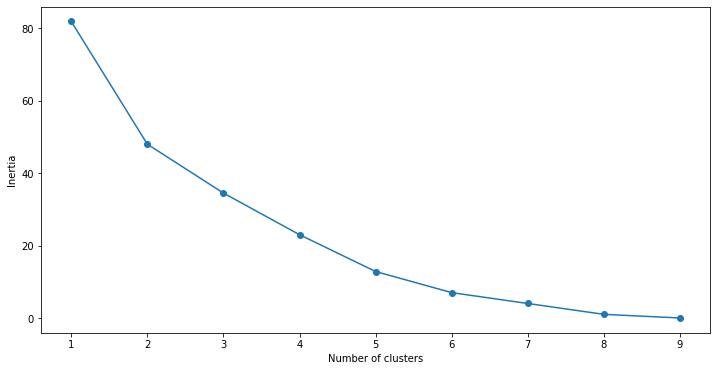

In [9]:
import matplotlib.pyplot as plt
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(aaum)
    SSE.append(kmeans.inertia_) 

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
from skfuzzy.cluster import cmeans
ans= cmeans(aaum,c=2,m=2,maxiter=300,error=0)
print(np.array(ans[1].T))


[[0.7339564  0.2660436 ]
 [0.78417354 0.21582646]
 [0.80735254 0.19264746]
 [0.20636052 0.79363948]
 [0.07041745 0.92958255]
 [0.13597409 0.86402591]
 [0.48366622 0.51633378]
 [0.31351642 0.68648358]
 [0.79140038 0.20859962]
 [0.80735254 0.19264746]]


In [11]:
distances_fcmeans = np.array(ans[1]).T
attr_fragment_cmeans = np.zeros(len(distances_fcmeans),dtype=np.int32)
for i in range(len(distances_fcmeans)):
    attr_fragment_cmeans[i] = np.argmax(distances_fcmeans[i])+1
distance_frag_cmeans = np.column_stack((distances_fcmeans,attr_fragment_cmeans))
distance_frag_cmeans


array([[0.7339564 , 0.2660436 , 1.        ],
       [0.78417354, 0.21582646, 1.        ],
       [0.80735254, 0.19264746, 1.        ],
       [0.20636052, 0.79363948, 2.        ],
       [0.07041745, 0.92958255, 2.        ],
       [0.13597409, 0.86402591, 2.        ],
       [0.48366622, 0.51633378, 2.        ],
       [0.31351642, 0.68648358, 2.        ],
       [0.79140038, 0.20859962, 1.        ],
       [0.80735254, 0.19264746, 1.        ]])

In [13]:
fragment_allocation_cmeans=np.zeros((saum.shape[0],2),dtype=np.int32)
for i in range(len(saum)):
    total_access = 0
    for j in range(len(saum[0])):
        if saum[i][j] == 1 and distance_frag_cmeans[j][2]==1:
            total_access += saum[i][j]
    fragment_allocation_cmeans[i][0]=total_access
fragment_allocation_cmeans

for i in range(len(saum)):
    total_access = 0
    for j in range(len(saum[0])):
        if saum[i][j] == 1 and distance_frag_cmeans[j][2]==2:
            total_access += saum[i][j]
    fragment_allocation_cmeans[i][1]=total_access
fragment_allocation_cmeans = pd.DataFrame((fragment_allocation_cmeans))
fragment_allocation_cmeans.columns=['AttrFromFragmentOne','AttrFromFragmentTwo']
fragment_allocation_cmeans.index=user_query_list.index
fragment_allocation_cmeans

,AttrFromFragmentOne,AttrFromFragmentTwo
sites,,
1,1,1
2,3,0
3,1,1
4,1,2
5,0,5
6,0,3
7,2,3
8,5,5
9,5,5
